In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
city=pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [3]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [4]:
city['City'].value_counts()

Springfield                  9545
Worcester                    8359
León                         7469
Rongcheng                    6526
Cambridge                    6478
Columbus                     6478
Syracuse                     6478
Brest                        6478
Birmingham                   6478
London                       6478
Manchester                   6478
Saint Petersburg             6478
Santiago                     6203
Aurora                       6101
Alexandria                   5908
Arlington                    5564
Barcelona                    5516
Valencia                     5516
Kingston                     5516
Cartagena                    5516
Salamanca                    5384
Peoria                       5384
Córdoba                      5274
Lalitpur                     5226
Jamalpur                     5226
Bharatpur                    5226
Hyderabad                    5226
Saint Louis                  5216
Richmond                     5216
Toledo        

In [5]:
Thiruvananthapuram=city[city['City']=='Thiruvananthapuram']
Thiruvananthapuram.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
7588917,1796-01-01,26.022,2.211,Thiruvananthapuram,India,8.84N,77.03E
7588918,1796-02-01,26.681,1.389,Thiruvananthapuram,India,8.84N,77.03E
7588919,1796-03-01,27.107,2.333,Thiruvananthapuram,India,8.84N,77.03E
7588920,1796-04-01,28.119,1.663,Thiruvananthapuram,India,8.84N,77.03E
7588921,1796-05-01,27.759,1.275,Thiruvananthapuram,India,8.84N,77.03E


In [6]:
t=Thiruvananthapuram

In [7]:
t.dt.value_counts()

1796-01-01    1
1942-05-01    1
1940-11-01    1
1940-12-01    1
1941-01-01    1
1941-02-01    1
1941-03-01    1
1941-04-01    1
1941-05-01    1
1941-06-01    1
1941-07-01    1
1941-08-01    1
1941-09-01    1
1941-10-01    1
1941-11-01    1
1941-12-01    1
1942-01-01    1
1942-02-01    1
1942-03-01    1
1940-10-01    1
1940-09-01    1
1940-08-01    1
1939-10-01    1
1939-03-01    1
1939-04-01    1
1939-05-01    1
1939-06-01    1
1939-07-01    1
1939-08-01    1
1939-09-01    1
1939-11-01    1
1940-07-01    1
1939-12-01    1
1940-01-01    1
1940-02-01    1
1940-03-01    1
1940-04-01    1
1940-05-01    1
1940-06-01    1
1942-04-01    1
1942-06-01    1
1939-01-01    1
1942-07-01    1
1944-04-01    1
1944-05-01    1
1944-06-01    1
1944-07-01    1
1944-08-01    1
1944-09-01    1
1944-10-01    1
1944-11-01    1
1944-12-01    1
1945-01-01    1
1945-02-01    1
1945-03-01    1
1945-04-01    1
1945-05-01    1
1945-06-01    1
1945-07-01    1
1945-08-01    1
1944-03-01    1
1944-02-01    1
1944-01-

In [8]:
t.isna().sum()

dt                                 0
AverageTemperature               129
AverageTemperatureUncertainty    129
City                               0
Country                            0
Latitude                           0
Longitude                          0
dtype: int64

In [9]:
t.shape

(2613, 7)

In [10]:
t=t.ffill()

In [11]:
t.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [12]:
t['dt']=pd.to_datetime(t['dt'])

In [13]:
t=t.set_index('dt')

In [14]:
t.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1796-01-01,26.022,2.211,Thiruvananthapuram,India,8.84N,77.03E
1796-02-01,26.681,1.389,Thiruvananthapuram,India,8.84N,77.03E
1796-03-01,27.107,2.333,Thiruvananthapuram,India,8.84N,77.03E
1796-04-01,28.119,1.663,Thiruvananthapuram,India,8.84N,77.03E
1796-05-01,27.759,1.275,Thiruvananthapuram,India,8.84N,77.03E


<AxesSubplot:xlabel='dt'>

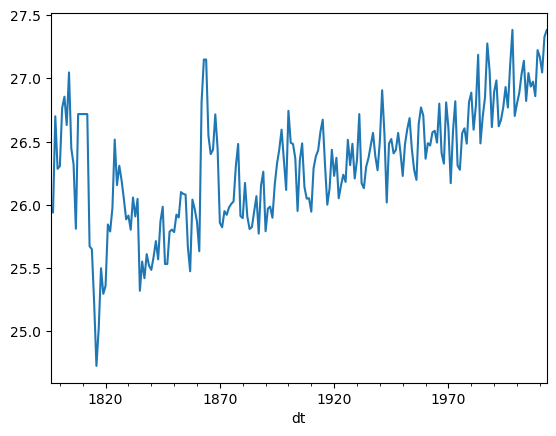

In [15]:
t.AverageTemperature.resample('Y').mean().plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

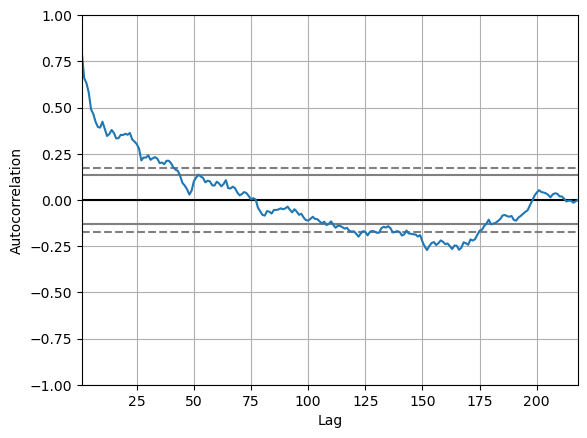

In [16]:
pd.plotting.autocorrelation_plot(t.AverageTemperature.resample('Y').mean())


In [ ]:
def plots():
    city=pd.read_csv('GlobalLandTemperaturesByCity.csv')
    t=city[city['City']=='Thiruvananthapuram']
    t=t.ffill()
    t['dt']=pd.to_datetime(t['dt'])
    t=t.set_index('dt')
    pd.plotting.autocorrelation_plot(t.AverageTemperature.resample('Y').mean())
    t.AverageTemperature.resample('Y').mean().plot()

In [17]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

# working with dates
from datetime import datetime

# modeling
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing

# evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt 

In [18]:
test_size=.90
val_size=.70
n=t.shape[0]
test_start_index=round(test_size * n)
val_start_index=round(val_size*n)

train=t[:val_start_index]
val=t[val_start_index:test_start_index]
test=t[test_start_index:]


print(train.shape, val.shape, test.shape)

(1829, 6) (523, 6) (261, 6)


In [209]:
train = t[:'1947']
val= t['1948':'1990']
test = t['1991':]


In [210]:
def splitdata():
    city=pd.read_csv('GlobalLandTemperaturesByCity.csv')
    t=city[city['City']=='Thiruvananthapuram']
    t=t.ffill()
    t['dt']=pd.to_datetime(t['dt'])
    t=t.set_index('dt')
    train = t[:'1947']
    val= t['1948':'1990']
    test = t['1991':]
    return train,val,test
    

In [20]:
val_start_index

1829

In [21]:
train.tail(10)

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1947-03-01,28.245,0.214,Thiruvananthapuram,India,8.84N,77.03E
1947-04-01,27.924,0.453,Thiruvananthapuram,India,8.84N,77.03E
1947-05-01,28.191,0.321,Thiruvananthapuram,India,8.84N,77.03E
1947-06-01,26.010,0.181,Thiruvananthapuram,India,8.84N,77.03E
1947-07-01,25.553,0.234,Thiruvananthapuram,India,8.84N,77.03E
1947-08-01,25.240,0.299,Thiruvananthapuram,India,8.84N,77.03E
1947-09-01,25.429,0.476,Thiruvananthapuram,India,8.84N,77.03E
1947-10-01,25.564,0.140,Thiruvananthapuram,India,8.84N,77.03E
1947-11-01,25.981,0.361,Thiruvananthapuram,India,8.84N,77.03E


In [22]:
val.tail(25)

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1988-12-01,26.275,0.306,Thiruvananthapuram,India,8.84N,77.03E
1989-01-01,26.392,0.347,Thiruvananthapuram,India,8.84N,77.03E
1989-02-01,26.741,0.582,Thiruvananthapuram,India,8.84N,77.03E
1989-03-01,28.146,0.223,Thiruvananthapuram,India,8.84N,77.03E
1989-04-01,28.822,0.220,Thiruvananthapuram,India,8.84N,77.03E
1989-05-01,28.122,0.225,Thiruvananthapuram,India,8.84N,77.03E
1989-06-01,25.478,0.340,Thiruvananthapuram,India,8.84N,77.03E
1989-07-01,25.155,0.231,Thiruvananthapuram,India,8.84N,77.03E
1989-08-01,25.573,0.394,Thiruvananthapuram,India,8.84N,77.03E


In [23]:
test.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1991-01-01,26.812,0.202,Thiruvananthapuram,India,8.84N,77.03E
1991-02-01,27.453,0.200,Thiruvananthapuram,India,8.84N,77.03E
1991-03-01,29.247,0.241,Thiruvananthapuram,India,8.84N,77.03E
1991-04-01,29.093,0.199,Thiruvananthapuram,India,8.84N,77.03E
1991-05-01,29.061,0.444,Thiruvananthapuram,India,8.84N,77.03E


<AxesSubplot:xlabel='dt'>

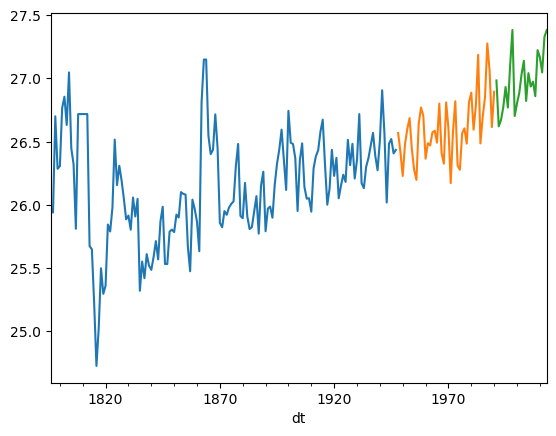

In [24]:
train['AverageTemperature'].resample('Y').mean().plot()
val['AverageTemperature'].resample('Y').mean().plot()
test['AverageTemperature'].resample('Y').mean().plot()
#t.AverageTemperature.resample('Y').mean().plot(alpha=.5)

<AxesSubplot:xlabel='dt'>

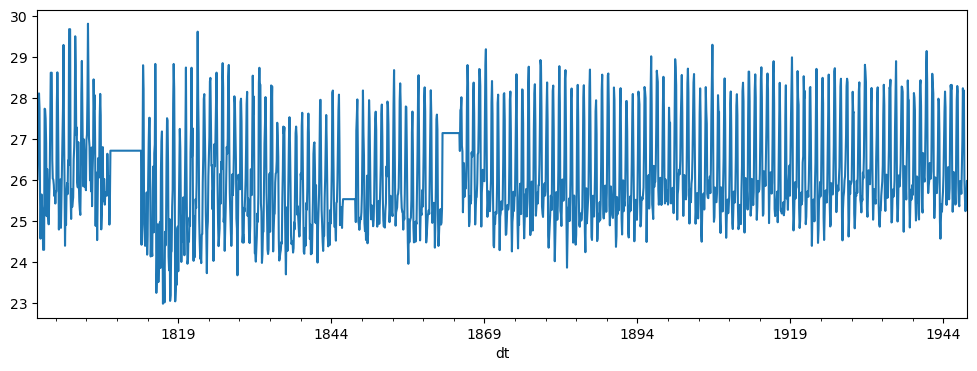

In [25]:
plt.figure(figsize = (12,4))
train['AverageTemperature'].resample('M').mean().plot()


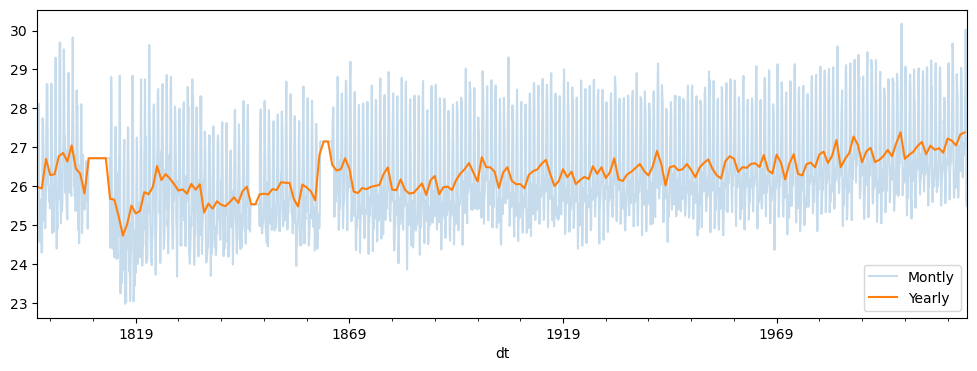

In [26]:
plt.figure(figsize = (12,4))
t['AverageTemperature'].resample('M').mean().plot(alpha= .25,label='Montly')
t['AverageTemperature'].resample('Y').mean().plot(label='Yearly')
plt.legend()

# modeling

In [27]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(mean_squared_error(val[target_var], yhat_df[target_var], squared=False), 5)
    return rmse

def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1, color='#377eb8')
    plt.plot(val[target_var], label='Validate', linewidth=1, color='#ff7f00')
    plt.plot(yhat_df[target_var], label='yhat', linewidth=2, color='#a65628')
    plt.legend()
    plt.title('Average Temperature')
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [28]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [29]:
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

### Last obs

In [30]:
last_amount=train['AverageTemperature'][-1:][0]

In [31]:
yhat_df = pd.DataFrame({'AverageTemperature': [last_amount]},index=val.index)

yhat_df.head()

,AverageTemperature
dt,
1948-01-01,25.827
1948-02-01,25.827
1948-03-01,25.827
1948-04-01,25.827
1948-05-01,25.827


AverageTemperature -- RMSE: 1


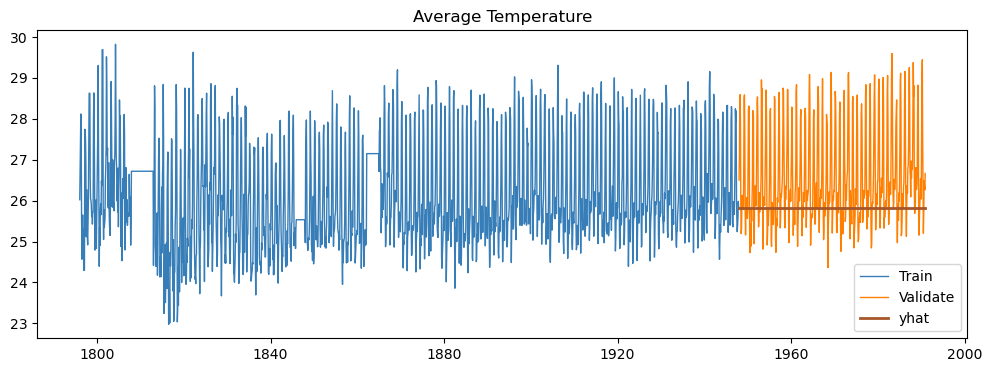

In [32]:
plot_and_eval('AverageTemperature')

In [33]:
eval_df = append_eval_df('last_observed_value', 'AverageTemperature')

eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,1.41405


### simple mean

In [34]:
avg_amount=round(train['AverageTemperature'].mean(),2)
avg_amount

26.13

In [35]:
yhat_df = pd.DataFrame({'AverageTemperature': [avg_amount]},index=val.index)

yhat_df.head()

,AverageTemperature
dt,
1948-01-01,26.13
1948-02-01,26.13
1948-03-01,26.13
1948-04-01,26.13
1948-05-01,26.13


AverageTemperature -- RMSE: 1


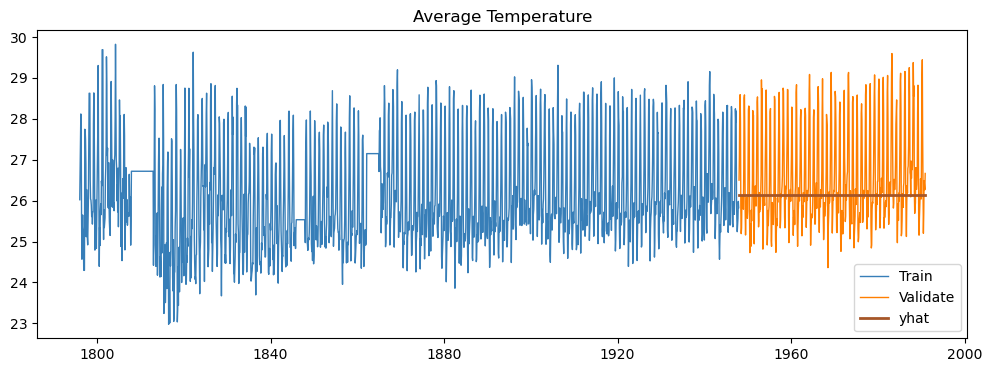

In [36]:
plot_and_eval('AverageTemperature')

In [37]:
eval_df = append_eval_df('simple_mean', 'AverageTemperature')

eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,1.41405
1,simple_mean,AverageTemperature,1.27332


### rolling avg

In [38]:
period = 30

rolling_avg = round(train['AverageTemperature'].rolling(period).mean().iloc[-1], 2)

# yhat_df = make_predictions()

yhat_df = pd.DataFrame({'AverageTemperature': [rolling_avg],}, index = val.index)
yhat_df.head()

,AverageTemperature
dt,
1948-01-01,26.28
1948-02-01,26.28
1948-03-01,26.28
1948-04-01,26.28
1948-05-01,26.28


AverageTemperature -- RMSE: 1


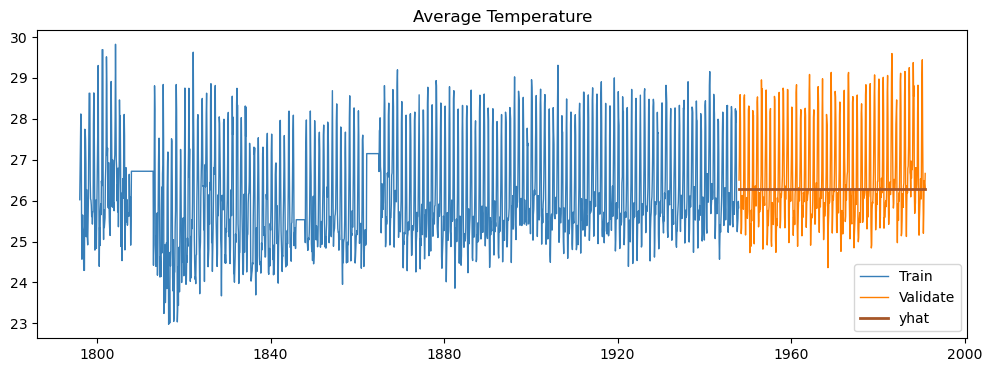

In [39]:
plot_and_eval('AverageTemperature')

In [40]:
eval_df = append_eval_df('rolling_avg', 'AverageTemperature')

eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,1.41405
1,simple_mean,AverageTemperature,1.27332
2,rolling_avg,AverageTemperature,1.22559


### Holts

In [41]:
col = 'AverageTemperature' 
model = Holt(train[col], exponential=False, damped=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
model = model.fit(optimized=True)

In [43]:
yhat_values = model.predict(start = val.index[0],
                              end = val.index[-1])
yhat_df[col] = round(yhat_values, 2)

In [44]:
yhat_df.head()

,AverageTemperature
dt,
1948-01-01,25.83
1948-02-01,25.83
1948-03-01,25.83
1948-04-01,25.83
1948-05-01,25.83


AverageTemperature -- RMSE: 1


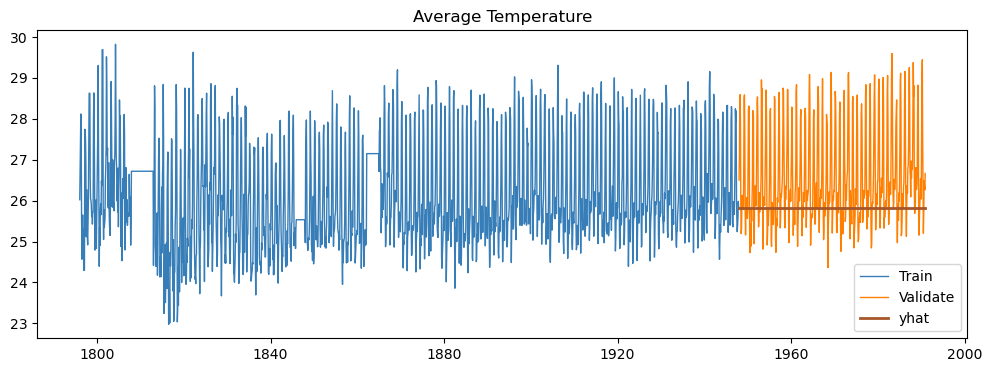

In [45]:
plot_and_eval('AverageTemperature')

In [46]:
eval_df=append_eval_df('holts_optimized','AverageTemperature')
eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,1.41405
1,simple_mean,AverageTemperature,1.27332
2,rolling_avg,AverageTemperature,1.22559
3,holts_optimized,AverageTemperature,1.41240


### holts seasonal

In [47]:
hst_avg_temp_fit1 = ExponentialSmoothing(train.AverageTemperature, seasonal_periods=365, trend='add', seasonal='add').fit()
hst_avg_temp_fit2 = ExponentialSmoothing(train.AverageTemperature, seasonal_periods=365, trend='add', seasonal='mul').fit()
hst_avg_temp_fit3 = ExponentialSmoothing(train.AverageTemperature, seasonal_periods=365, trend='add', seasonal='add', damped=True).fit()
hst_avg_temp_fit4 = ExponentialSmoothing(train.AverageTemperature, seasonal_periods=365, trend='add', seasonal='mul', damped=True).fit()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(da

In [48]:
results_avg_temp=pd.DataFrame({'model':['hst_avg_temp_fit1', 'hst_avg_temp_fit2', 'hst_avg_temp_fit3', 'hst_avg_temp_fit4'],
                              'SSE':[hst_avg_temp_fit1.sse, hst_avg_temp_fit2.sse, hst_avg_temp_fit3.sse, hst_avg_temp_fit4.sse]})
results_avg_temp.sort_values('SSE')

,model,SSE
2,hst_avg_temp_fit3,1414.357840
0,hst_avg_temp_fit1,1414.467538
3,hst_avg_temp_fit4,1415.366872
1,hst_avg_temp_fit2,1415.516999


In [49]:
yhat_df = pd.DataFrame({'AverageTemperature': hst_avg_temp_fit3.forecast(val.shape[0])},
                          index=val.index)
yhat_df

,AverageTemperature
dt,
1948-01-01,25.887641
1948-02-01,25.293247
1948-03-01,25.252482
1948-04-01,24.661878
1948-05-01,24.972762
1948-06-01,25.456632
1948-07-01,25.357714
1948-08-01,25.424748
1948-09-01,25.425923


AverageTemperature -- RMSE: 2


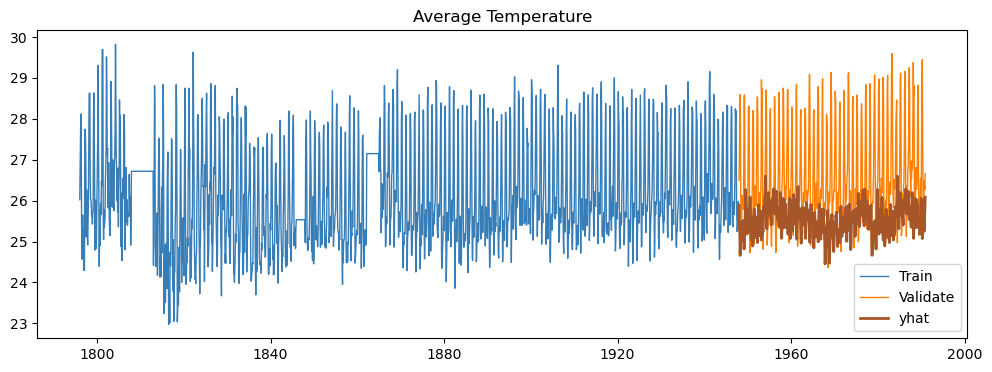

In [50]:
plot_and_eval('AverageTemperature')

In [51]:
eval_df=append_eval_df('holts_seasonal','AverageTemperature')
eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,1.41405
1,simple_mean,AverageTemperature,1.27332
2,rolling_avg,AverageTemperature,1.22559
3,holts_optimized,AverageTemperature,1.41240
4,holts_seasonal,AverageTemperature,1.67716


 ### previous Year

In [53]:
train.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1796-01-01,26.022,2.211,Thiruvananthapuram,India,8.84N,77.03E
1796-02-01,26.681,1.389,Thiruvananthapuram,India,8.84N,77.03E
1796-03-01,27.107,2.333,Thiruvananthapuram,India,8.84N,77.03E
1796-04-01,28.119,1.663,Thiruvananthapuram,India,8.84N,77.03E
1796-05-01,27.759,1.275,Thiruvananthapuram,India,8.84N,77.03E


In [56]:
train['AverageTemperature'].diff(365)

dt
1796-01-01      NaN
1796-02-01      NaN
1796-03-01      NaN
1796-04-01      NaN
1796-05-01      NaN
1796-06-01      NaN
1796-07-01      NaN
1796-08-01      NaN
1796-09-01      NaN
1796-10-01      NaN
1796-11-01      NaN
1796-12-01      NaN
1797-01-01      NaN
1797-02-01      NaN
1797-03-01      NaN
1797-04-01      NaN
1797-05-01      NaN
1797-06-01      NaN
1797-07-01      NaN
1797-08-01      NaN
1797-09-01      NaN
1797-10-01      NaN
1797-11-01      NaN
1797-12-01      NaN
1798-01-01      NaN
1798-02-01      NaN
1798-03-01      NaN
1798-04-01      NaN
1798-05-01      NaN
1798-06-01      NaN
1798-07-01      NaN
1798-08-01      NaN
1798-09-01      NaN
1798-10-01      NaN
1798-11-01      NaN
1798-12-01      NaN
1799-01-01      NaN
1799-02-01      NaN
1799-03-01      NaN
1799-04-01      NaN
1799-05-01      NaN
1799-06-01      NaN
1799-07-01      NaN
1799-08-01      NaN
1799-09-01      NaN
1799-10-01      NaN
1799-11-01      NaN
1799-12-01      NaN
1800-01-01      NaN
1800-02-01      N

In [63]:
yhat_df = pd.DataFrame(val['AverageTemperature'] + train['AverageTemperature'].diff(365).mean())
yhat_df

,AverageTemperature
dt,
1948-01-01,26.554275
1948-02-01,27.145275
1948-03-01,28.321275
1948-04-01,28.644275
1948-05-01,27.965275
1948-06-01,25.816275
1948-07-01,25.245275
1948-08-01,25.385275
1948-09-01,26.169275


In [64]:
yhat_df.shape

(516, 1)

In [65]:
val.shape

(516, 6)

In [66]:
yhat_df.index = val.index

AverageTemperature -- RMSE: 0


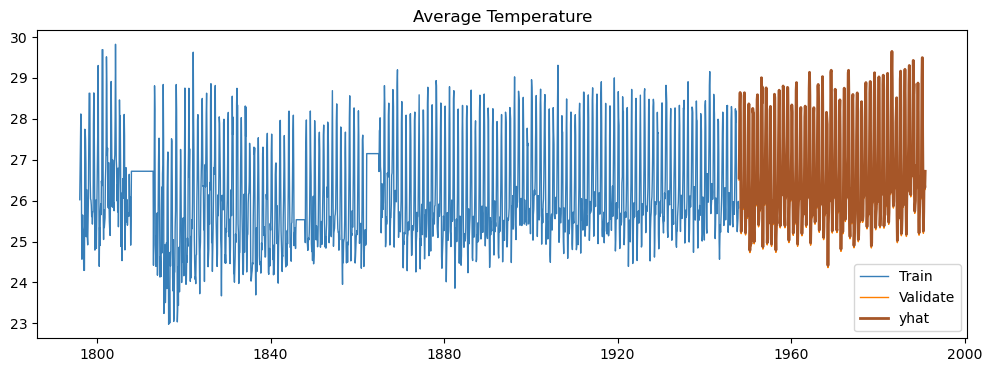

In [67]:
plot_and_eval('AverageTemperature')

In [68]:
eval_df = append_eval_df("previous_year", 'AverageTemperature')

In [69]:
eval_df.sort_values('rmse')

,model_type,target_var,rmse
5,previous_year,AverageTemperature,0.05327
2,rolling_avg,AverageTemperature,1.22559
1,simple_mean,AverageTemperature,1.27332
3,holts_optimized,AverageTemperature,1.41240
0,last_observed_value,AverageTemperature,1.41405
4,holts_seasonal,AverageTemperature,1.67716


### Test

In [ ]:
def test(train, val, test, target_var):
    yhat_df = pd.DataFrame(test['AverageTemperature'] + train['AverageTemperature'].diff(365).mean())
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], color='#377eb8', label='train')
    plt.plot(val[target_var], color='#ff7f00', label='validate')
    plt.plot(test[target_var], color='#4daf4a',label='test')
    plt.plot(yhat_df[target_var], color='#a65628', label='yhat')
    plt.legend()
    plt.title(Average Temperature)
    plt.show()
    trmse=mean_squared_error(test['AverageTemperature'], yhat_df['AverageTemperature'], squared=False)
    print('FINAL PERFORMANCE OF MODEL ON TEST DATA')
    print(f'rmse-average temperature: {trmse}')

In [70]:
train = t[:'1947']
val= t['1948':'1990']
test = t['1991':]

In [100]:
yhat_df = pd.DataFrame(test['AverageTemperature'] + train['AverageTemperature'].diff(365).mean())
yhat_df

,AverageTemperature
dt,
1991-01-01,26.865275
1991-02-01,27.506275
1991-03-01,29.300275
1991-04-01,29.146275
1991-05-01,29.114275
1991-06-01,25.890275
1991-07-01,25.607275
1991-08-01,25.649275
1991-09-01,26.859275


In [72]:
def final_plot(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], color='#377eb8', label='train')
    plt.plot(val[target_var], color='#ff7f00', label='validate')
    plt.plot(test[target_var], color='#4daf4a',label='test')
    plt.plot(yhat_df[target_var], color='#a65628', label='yhat')
    plt.legend()
    plt.title(target_var)
    plt.show()

FINAL PERFORMANCE OF MODEL ON TEST DATA
rmse-average temperature: 0.05327484578478447


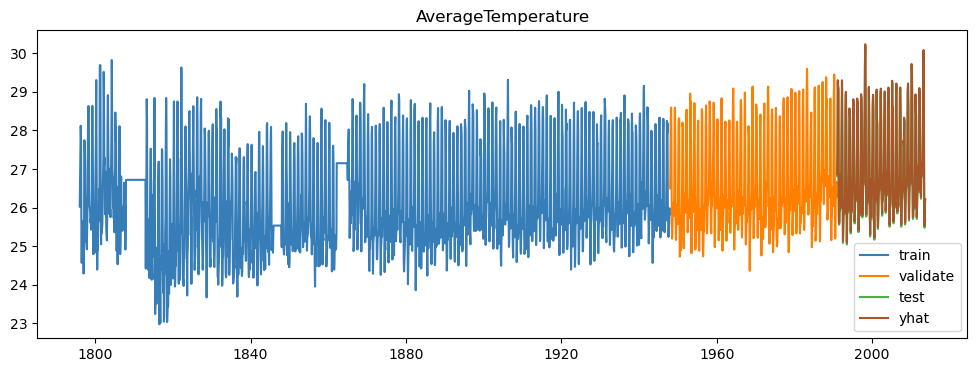

In [75]:
trmse=mean_squared_error(test['AverageTemperature'], yhat_df['AverageTemperature'], squared=False)
print('FINAL PERFORMANCE OF MODEL ON TEST DATA')
print(f'rmse-average temperature: {trmse}')
final_plot('AverageTemperature')

### Forcast

In [85]:
test.tail()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
2013-05-01,28.872,0.458,Thiruvananthapuram,India,8.84N,77.03E
2013-06-01,25.707,0.696,Thiruvananthapuram,India,8.84N,77.03E
2013-07-01,25.478,0.484,Thiruvananthapuram,India,8.84N,77.03E
2013-08-01,26.161,0.354,Thiruvananthapuram,India,8.84N,77.03E
2013-09-01,26.161,0.354,Thiruvananthapuram,India,8.84N,77.03E


In [201]:
future=test['2012-10':]
future

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
2012-10-01,26.795,0.428,Thiruvananthapuram,India,8.84N,77.03E
2012-11-01,27.105,0.509,Thiruvananthapuram,India,8.84N,77.03E
2012-12-01,26.986,0.470,Thiruvananthapuram,India,8.84N,77.03E
2013-01-01,27.070,0.372,Thiruvananthapuram,India,8.84N,77.03E
2013-02-01,27.848,0.693,Thiruvananthapuram,India,8.84N,77.03E
2013-03-01,29.111,0.584,Thiruvananthapuram,India,8.84N,77.03E
2013-04-01,30.026,0.343,Thiruvananthapuram,India,8.84N,77.03E
2013-05-01,28.872,0.458,Thiruvananthapuram,India,8.84N,77.03E
2013-06-01,25.707,0.696,Thiruvananthapuram,India,8.84N,77.03E


In [93]:
future=future.reset_index()
future.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,2013-01-01,27.070,0.372,Thiruvananthapuram,India,8.84N,77.03E
1,2013-02-01,27.848,0.693,Thiruvananthapuram,India,8.84N,77.03E
2,2013-03-01,29.111,0.584,Thiruvananthapuram,India,8.84N,77.03E
3,2013-04-01,30.026,0.343,Thiruvananthapuram,India,8.84N,77.03E
4,2013-05-01,28.872,0.458,Thiruvananthapuram,India,8.84N,77.03E


In [95]:
future['dt']=future['dt']+pd.DateOffset(years=1)
future.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,2014-01-01,27.070,0.372,Thiruvananthapuram,India,8.84N,77.03E
1,2014-02-01,27.848,0.693,Thiruvananthapuram,India,8.84N,77.03E
2,2014-03-01,29.111,0.584,Thiruvananthapuram,India,8.84N,77.03E
3,2014-04-01,30.026,0.343,Thiruvananthapuram,India,8.84N,77.03E
4,2014-05-01,28.872,0.458,Thiruvananthapuram,India,8.84N,77.03E


In [96]:
future=future.set_index('dt')
future.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
2014-01-01,27.070,0.372,Thiruvananthapuram,India,8.84N,77.03E
2014-02-01,27.848,0.693,Thiruvananthapuram,India,8.84N,77.03E
2014-03-01,29.111,0.584,Thiruvananthapuram,India,8.84N,77.03E
2014-04-01,30.026,0.343,Thiruvananthapuram,India,8.84N,77.03E
2014-05-01,28.872,0.458,Thiruvananthapuram,India,8.84N,77.03E


In [97]:
yhat_df=pd.DataFrame(future['AverageTemperature']+train['AverageTemperature'].diff(365).mean())

yhat_df

,AverageTemperature
dt,
2014-01-01,27.123275
2014-02-01,27.901275
2014-03-01,29.164275
2014-04-01,30.079275
2014-05-01,28.925275
2014-06-01,25.760275
2014-07-01,25.531275
2014-08-01,26.214275
2014-09-01,26.214275


In [101]:
def final_plot(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], color='#377eb8', label='Train')
    plt.plot(val[target_var], color='#ff7f00', label='Validate')
    plt.plot(test[target_var], color='#4daf4a', label='Test')
    plt.plot(yhat_df[target_var], color='#a65628', label='yhat')
    plt.plot(future[target_var], color='#984ea3', label='Forecast')
    plt.title(target_var)
    plt.legend()
    plt.show()

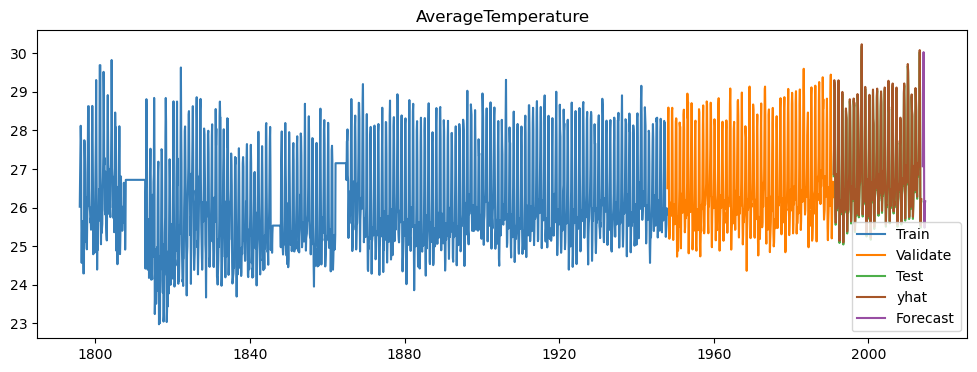

In [102]:
final_plot('AverageTemperature')

In [103]:
future.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
2014-01-01,27.070,0.372,Thiruvananthapuram,India,8.84N,77.03E
2014-02-01,27.848,0.693,Thiruvananthapuram,India,8.84N,77.03E
2014-03-01,29.111,0.584,Thiruvananthapuram,India,8.84N,77.03E
2014-04-01,30.026,0.343,Thiruvananthapuram,India,8.84N,77.03E
2014-05-01,28.872,0.458,Thiruvananthapuram,India,8.84N,77.03E


In [172]:
future=test['2013']

In [202]:
pred_df=pd.DataFrame()

for n in range(1,6):
    future=test['2012-10':]
    add_to_pred=train['AverageTemperature'].diff(365).mean()
    future.index=future.index+pd.DateOffset(years=n)
    future['AverageTemperature']=future['AverageTemperature']+add_to_pred
    pred_df=pd.concat([pred_df, future['AverageTemperature']], axis=0)
pred_df=pred_df.rename(columns={0:'AverageTemperature'})

In [ ]:
def forecast(train, val, test):
    pred_df=pd.DataFrame()
    yhat_df = pd.DataFrame(test['AverageTemperature'] + train['AverageTemperature'].diff(365).mean())
    for n in range(1,6):
        future=test['2012-10':]
        add_to_pred=train['AverageTemperature'].diff(365).mean()
        future.index=future.index+pd.DateOffset(years=n)
        future['AverageTemperature']=future['AverageTemperature']+add_to_pred
        pred_df=pd.concat([pred_df, future['AverageTemperature']], axis=0)
    pred_df=pred_df.rename(columns={0:'AverageTemperature'})
    
    plt.figure(figsize=(12,7))
    plt.plot(train[target_var], color='#377eb8', label='Train')
    plt.plot(val[target_var], color='#ff7f00', label='Validate')
    plt.plot(test[target_var], color='#4daf4a', label='Test')
    plt.plot(yhat_df[target_var], color='#a65628', label='yhat')
    plt.plot(pred_df[target_var], color='#984ea3', label='Forecast')
    plt.title('Forecast Average Temperature')
    plt.legend()
    plt.show()

In [203]:
pred_df

,AverageTemperature
2013-10-01,26.848275
2013-11-01,27.158275
2013-12-01,27.039275
2014-01-01,27.123275
2014-02-01,27.901275
2014-03-01,29.164275
2014-04-01,30.079275
2014-05-01,28.925275
2014-06-01,25.760275
2014-07-01,25.531275


In [207]:
def final_plot(target_var):
    plt.figure(figsize=(12,7))
    plt.plot(train[target_var], color='#377eb8', label='Train')
    plt.plot(val[target_var], color='#ff7f00', label='Validate')
    plt.plot(test[target_var], color='#4daf4a', label='Test')
    plt.plot(yhat_df[target_var], color='#a65628', label='yhat')
    plt.plot(pred_df[target_var], color='#984ea3', label='Forecast')
    plt.title(target_var)
    plt.legend()
    plt.show()

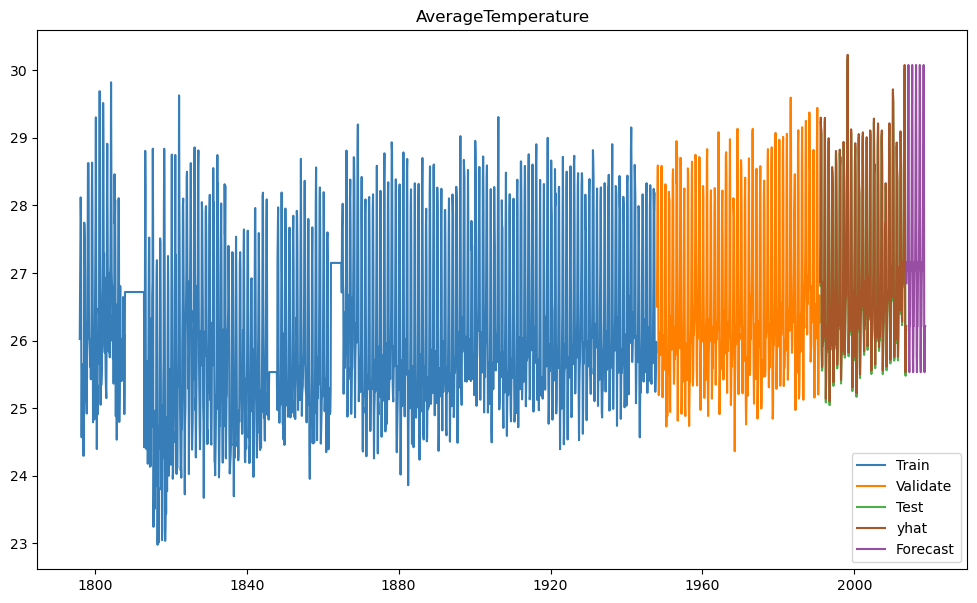

In [208]:
final_plot('AverageTemperature')